Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Data Preprocessing 

Training image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\VS code\\Fruits & Vegetables\\xtrain', 
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\VS code\\Fruits & Vegetables\\validation', 
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


In [4]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.18.0
Num GPUs Available:  0


Building Model

In [5]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\svaru.RAPTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [14]:
##Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=64)

Epoch 1/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.6461 - loss: 1.2762 - val_accuracy: 0.7293 - val_loss: 1.1278
Epoch 2/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6268 - loss: 1.3247 - val_accuracy: 0.7208 - val_loss: 1.1399
Epoch 3/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6619 - loss: 1.2518 - val_accuracy: 0.7293 - val_loss: 1.1289
Epoch 4/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6668 - loss: 1.1929 - val_accuracy: 0.7265 - val_loss: 1.1097
Epoch 5/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.6625 - loss: 1.1771 - val_accuracy: 0.7179 - val_loss: 1.1634
Epoch 6/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.6643 - loss: 1.2115 - val_accuracy: 0.7436 - val_loss: 1.1477
Epoch 7/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.6703 - loss: 1.2429 - val_accuracy: 0.7664 - val_loss: 0.9599
Epoch 8/64
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.6954 - loss: 1.1463 - val_accuracy: 

Evaluating Model

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9863 - loss: 0.0332
Training accuracy: 0.9903692007064819


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9672 - loss: 0.2723
Validation accuracy: 0.9601139426231384


Saving the Model

In [27]:
cnn.save('trained_model.keras')

In [29]:
training_history.history

{'accuracy': [0.6401284337043762,
  0.6317816972732544,
  0.6635634303092957,
  0.6651685237884521,
  0.6577849388122559,
  0.6622793078422546,
  0.681861937046051,
  0.6908507347106934,
  0.7226324081420898,
  0.7277688384056091,
  0.7425361275672913,
  0.7508828043937683,
  0.7528089880943298,
  0.7701444625854492,
  0.7707865238189697,
  0.774638831615448,
  0.7701444625854492,
  0.7884430289268494,
  0.8099518418312073,
  0.8192616105079651,
  0.8333868384361267,
  0.8288924694061279,
  0.8500802516937256,
  0.8542535901069641,
  0.8593900203704834,
  0.8786516785621643,
  0.863884449005127,
  0.8796147704124451,
  0.9004815220832825,
  0.9043338894844055,
  0.8947030305862427,
  0.9033707976341248,
  0.9155698418617249,
  0.9178169965744019,
  0.9126805663108826,
  0.9203852415084839,
  0.9245585799217224,
  0.9168539047241211,
  0.9178169965744019,
  0.9174959659576416,
  0.9133226275444031,
  0.933868408203125,
  0.9470304846763611,
  0.9483146071434021,
  0.9271268248558044,
  

In [28]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

Training Visualization

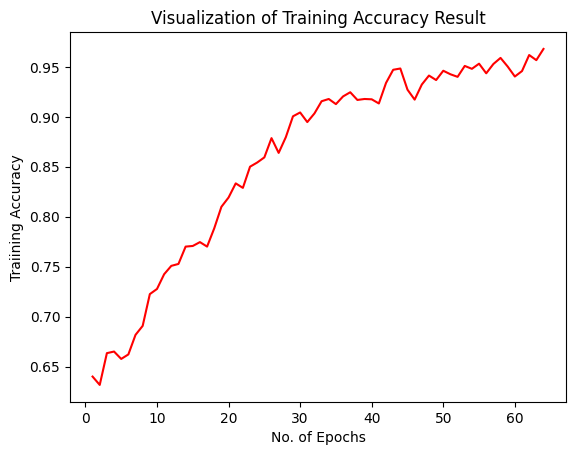

In [34]:
epochs = [i for i in range(1,65)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

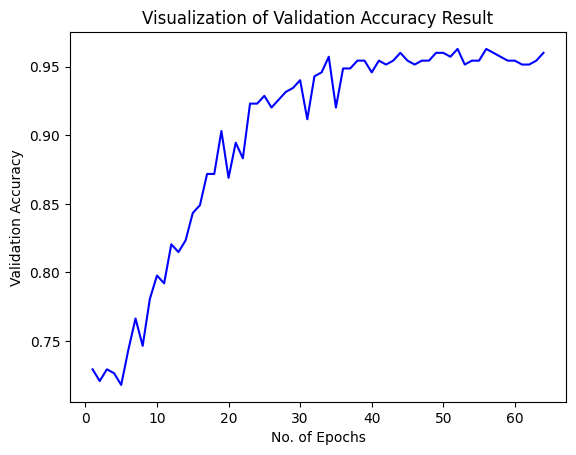

In [35]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test Set Evaluation

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\VS code\\Fruits & Vegetables\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [38]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9534 - loss: 0.2869
Test accuracy: 0.961002767086029
